---
title: Feature selection with PCA
teaching: 45
exercises: 2
keypoints:
- ""
objectives:
- ""
questions:
- "How can PCA be used as a feature selection method?"
---

# Multivariate Regression with PCA

### Ames housing dataset data: 
In this episode we'll:
1. create linear model for house price using all available data
2. examine the resulting model's quality
3. create another model with the same data, but use PCA
4. examine the resulting model's quality



## load dataset

In [28]:
from sklearn.datasets import fetch_openml

housing = fetch_openml(
    name="house_prices", 
    as_frame=True, 
    parser='auto'
)

## view data

In [4]:
df = housing.data.copy(deep=True)
df = df.astype({'Id':int})  # set data type of Id to int
df = df.set_index('Id')  # set Id column to be the index of the DataFrame
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


## all feature names

In [5]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

# Reminder to access the Data Dictionary

In [6]:
print(housing.DESCR)


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

#### EXERCISE_START: Understanding the data
What does TotRmsAbvGrd refer to?
#### EXERCISE_SOLUTION
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#### EXERCISE_END

#### EXERCISE_START: Variable Classes
How many variables are numeric?
#### EXERCISE_SOLUTION
36 numeric (are these all continuous or discrete?)
43 categorical (are these all categorical or ordinate ?)
#### EXERCISE_END

#### EXERCISE_START: Where's All The Nans?
How many Nan entries are there per variable?
#### EXERCISE_SOLUTION
##### CODE_START
df.isna().sum().sort_values(ascending=False).head(20)
##### CODE_END
#### OUTPUT_START
|column|count|
|---|---|
|PoolQC          |1453|
MiscFeature  |   1406
Alley         |  1369
Fence          | 1179
FireplaceQu     | 690
LotFrontage      |259
GarageYrBlt       |81
GarageCond        |81
GarageType        |81
GarageFinish      |81
GarageQual        |81
BsmtExposure      |38
BsmtFinType2      |38
BsmtCond          |37
BsmtQual          |37
BsmtFinType1      |37
MasVnrArea        | 8
MasVnrType        | 8
Electrical        | 1
MSSubClass        | 0
dtype: int64

#### OUTPUT_END
#### EXERCISE_END

#### EXERCISE_START
Which of these variables could be the best predictor of house sale price? Why?
#### EXERCISE_SOLUTION
Possible answers: SquareFt, OverallQual, YearBuilt
They intutively are going to be corrleated with SalePrice - but NB: also with each other!
#### EXERCISE_END


# Target Feature: SalePrice

In [7]:
# add target variable 'sales price' to data df from housing object
df[housing.target_names[0]] = housing.target.tolist()
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## what does SalePrice look like?

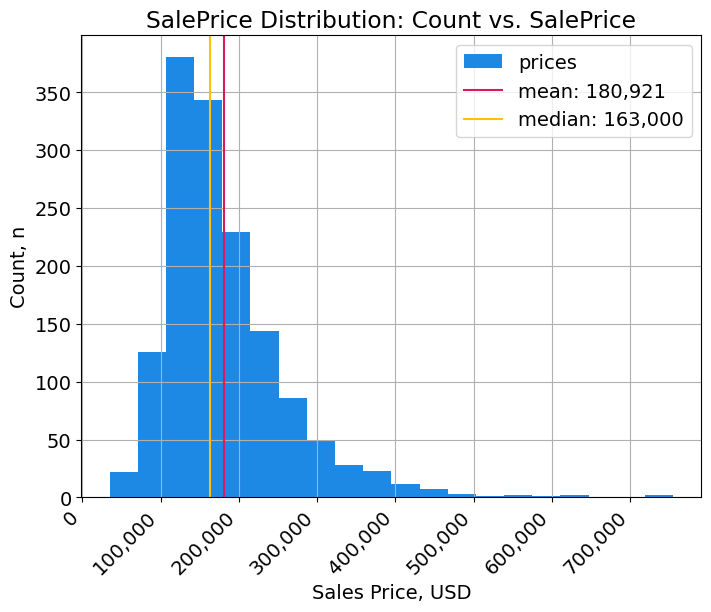

In [8]:
import helper_functions
helper_functions.plot_salesprice(
    df,
    # ylog=True
)

Is this a normal distribution? Will that distribution influcence modelling this value? How?

## Log Sales price

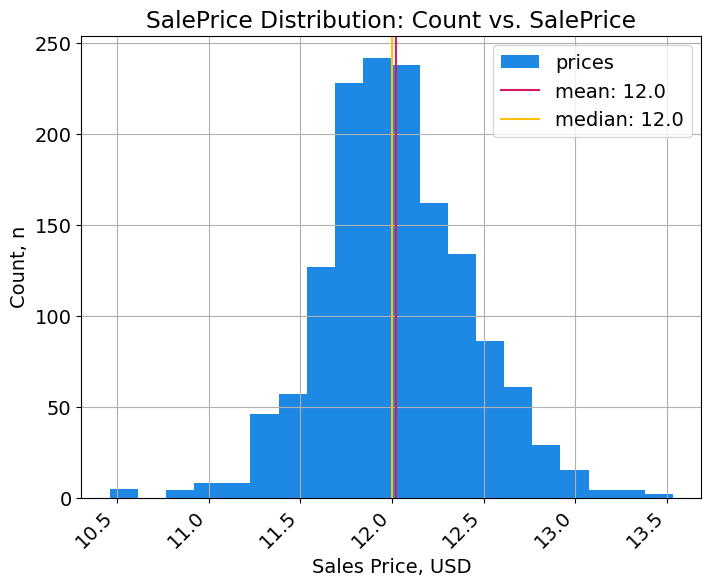

In [9]:
import numpy as np
import helper_functions

# convert to normal
df['SalePrice'] = np.log(df['SalePrice'].tolist())

helper_functions.plot_salesprice(
   df,
    # ylog=True
)

#### EXERCISE_START: Modelling Dataset Description
1. how many observations are there in our dataset?
2. how many features are there in the whole dataset?
3. how many **numerical** features are there in the whole dataset?

#### EXERCISE_SOLUTION
1. 1460 observations (len(df))
2. 79 features total (len(df.columns.tolist())) - 1 (can't use SalesPrice)
3. 36 numerical features (len(df[num_cols].columns.tolist()) - 1 (can't use SalesPrice)

#### EXERCISE_END


#### EXERCISE_START:Modelling Feature Selection
1. Can all of those features be used in a model?
2. Would you want to use all of those features?
#### EXERCISE_SOLUTION
1. yes all the features could be used. With possible implications for the quality of the model.
3. features that are not (anti)correlated with the target variable may not add any useful information to the model
3. features that are correlated with other features may not add a lot more information and may produce a poorer quality model.

#### EXERCISE_END

#### EXERCISE_START:Model Feature Count
2. how many features should be used total?
#### EXERCISE_SOLUTION
### A possible approach:
0. n = number of observations
1. uncorrelated features count = (n - 1)
2. as correlation increases, feature count proportional to sqrt(n)
    1. assuming some correlation: sqrt(1460) = 38.21
per: [Optimal number of features as a function of sample size for various classification rules](https://academic.oup.com/bioinformatics/article/21/8/1509/249540)

### Data analysis and modeling can be very emprical 
You need to try things out to see what works. If your features are indepent and identically distributed, or not, will impact how many observations are required

### Generally for a classifcation model
1. Distribution of features per target class matters a ton
2. More observations mean you can use more features
#### EXERCISE_END

#### EXERCISE_START:Model Feature Quality
4. which features should be used to predict the target variable? (which variables are good predictors?)
#### EXERCISE_SOLUTION
Many possible answers here, some general ideas
1. those that are most correlated with the target variable
2. those that are not correlated with each other
#### EXERCISE_END

# Begin data prep to Build regression model to predict sales price

# Use All Features - One-hot encode Categorical Variables

In [10]:
# one hot encode nominative variables - also remove SalePrice
from preprocessing import encode_predictors_housing_data
model_df = encode_predictors_housing_data(df)

In [21]:
# Original DataFrame dimensions 
# (df has SalesPrice, model_df doesn't)
print(f"{df.shape=}")
print(f"{model_df.shape=}")

df.shape=(1460, 80)
model_df.shape=(1460, 215)


In [ ]:
# # one hot encode categorical variables
# import pandas as pd
# numeric_variables = df.describe().columns.tolist()
# nominative_variables = [x for x in df.columns.tolist() if x not in numeric_variables]

# dummy_df = pd.get_dummies(df[nominative_variables])
# print(dummy_df.shape)
# dummy_df

In [ ]:
# # merge one-hot encoded columns with numeric columns
# model_df = pd.concat([df[numeric_variables], dummy_df], axis=1) #.drop('SalePrice', axis=1)

# # how many total coulmns now?
# print(model_df.shape)
# model_df

In [16]:
# How many *numerical* columns now?
model_df.describe() 

,LowQualFinSF,KitchenAbvGr,LotFrontage,MasVnrArea,BsmtFullBath,YrSold,YearRemodAdd,OverallQual,Fireplaces,BsmtFinSF1,...,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,CentralAir,Street
count,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,1.046575,70.049958,103.685262,0.425342,2007.815753,1984.865753,6.099315,0.613014,443.639726,...,0.000685,0.982192,0.000685,0.000685,0.000685,0.007534,0.003425,0.004110,0.934932,0.995890
std,48.623081,0.220338,24.284752,181.066207,0.518911,1.328095,20.645407,1.382997,0.644666,456.098091,...,0.026171,0.132299,0.026171,0.026171,0.026171,0.086502,0.058440,0.063996,0.246731,0.063996
min,0.000000,0.000000,21.000000,0.000000,0.000000,2006.000000,1950.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,59.000000,0.000000,0.000000,2007.000000,1967.000000,5.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,1.000000,69.000000,0.000000,0.000000,2008.000000,1994.000000,6.000000,1.000000,383.500000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,1.000000,80.000000,166.000000,1.000000,2009.000000,2004.000000,7.000000,1.000000,712.250000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,572.000000,3.000000,313.000000,1600.000000,3.000000,2010.000000,2010.000000,10.000000,3.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Plot correlations and histograms of those columns

Reminder:
1. What features should go in a model to predict high house price?
2. What features are correlated with high house price?

# Remove nulls from features

In [17]:
# which columns have the most nulls
model_df.isnull().sum().sort_values(ascending=False).head(5)

LotFrontage        259
GarageYrBlt         81
MasVnrArea           8
LowQualFinSF         0
Condition1_PosN      0
dtype: int64

In [18]:
# assume null means none - replace all nulls with zeros for lotFrontage and MasVnrArea
no_null_model_df = model_df.copy(deep=True)

# LotFrontage: Linear feet of street connected to property
no_null_model_df['LotFrontage'] = no_null_model_df['LotFrontage'].fillna(0)

# MasVnrArea: Masonry veneer area in square feet
no_null_model_df['MasVnrArea'] = no_null_model_df['MasVnrArea'].fillna(0)

# GarageYrBlt 0 makes no sense - replace with mean
no_null_model_df['GarageYrBlt'] = no_null_model_df['GarageYrBlt'].fillna(no_null_model_df['GarageYrBlt'].mean())

# check results - expext no nulls now.
no_null_model_df.isnull().sum().sort_values(ascending=False).head(5)

LowQualFinSF            0
Neighborhood_StoneBr    0
Neighborhood_Veenker    0
GarageType_2Types       0
GarageType_Attchd       0
dtype: int64

# define features and target

In [33]:
# define features and target

# features = no_null_model_df.drop('SalePrice', axis=1)
# features
# target = no_null_model_df['SalePrice']
features = no_null_model_df
target = df['SalePrice']

In [34]:
# confirm features do not contain target
[x for x in features.columns if x == 'SalePrice']

[]

# Establish Model Performance Baseline

### How well does always guessing the mean do in terms of RMSE?

In [37]:
from math import sqrt

mean_sale_price = df.SalePrice.mean()
print(f"{mean_sale_price=:.2f}")

diffs = df.SalePrice - mean_sale_price
rse = (diffs * diffs).apply(sqrt)
baseline_rmse = rse.mean()
print(f'baseline rmse: {baseline_rmse:.2f}')

mean_sale_price=12.02
baseline rmse: 0.31


# Define function to fit and assess a Linear model

In [46]:
import pandas as pd
from collections import defaultdict
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from typing import Tuple
from math import sqrt
import numpy as np


def run_linear_regression_with_kf(features: pd.DataFrame, target: pd.Series, 
                                    n_splits=3, title='logistic regression model'
                                   ) -> Tuple[float,float,float,float]:
    """
    scale, split, and model data. Return model performance statistics, plot confusion matrix
    feature: dataframe of feature columns to model
    target: series of targets to model against
    test_size: fraction of labels to use in test split
    title: title for chart
    return: recall mean, recall sd, precision mean, precision sd
    """
    # set up splits/folds and array for stats.
    kf = KFold(n_splits=n_splits)
    r2s = np.zeros(n_splits)
    rmses = np.zeros(n_splits)
    train_rmses = np.zeros(n_splits)
    
    # fit model for each split/fold
    for i, (train_idx, test_idx) in enumerate(kf.split(X=features, y=target)):
        # split features data for dataframes
        try:
            X_train = features.iloc[train_idx]
            y_train = target.iloc[train_idx]
            X_test = features.iloc[test_idx]
            y_test = target.iloc[test_idx]
        
        # or split features data for ndarrays (pca transformed features)
        except AttributeError:  
            X_train = features[train_idx]
            y_train = target.iloc[train_idx]
            X_test = features[test_idx]
            y_test = target.iloc[test_idx]
            
        
        # scale all features to training features
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
                    
        # fit model, evaluate
        regr = LinearRegression().fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        r2s[i] = r2_score(y_test, y_pred)
        rmses[i] = sqrt(mean_squared_error(y_test, y_pred))
        y_pred_train = regr.predict(X_train)
        train_rmses[i] = sqrt(mean_squared_error(y_train, y_pred_train))

    r2_mean = r2s.mean()
    r2_sd = r2s.std()
    rmse_mean = rmses.mean()
    rmse_sd = rmses.std()
    train_rmse_mean = train_rmses.mean() 
    train_rmse_sd = train_rmses.std() 
    
    # plot y_true vs y_pred
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(y_test, y_pred, alpha=0.3)
    ax.set_title(f'{title}\n' \
                 'mean r2: {:.2f},\n'\
                 'mean rmse {:.2f}'
                 .format(r2_mean, rmse_mean)
    )
    ax.set_xlabel('True Value')
    ax.set_ylabel('Predicted Value')
    stats = (r2_mean, rmse_mean, r2_sd, rmse_sd)
    train_test_errors = (rmse_mean, rmse_sd, train_rmse_mean, train_rmse_sd)
    model_data_and_pred = (regr, X_train, y_train, X_test, y_test, y_pred)
    fig_and_ax = (fig, ax)
    
    return stats, train_test_errors, model_data_and_pred, fig_and_ax 




## fit a linear model with all features

In [47]:
# set kfold splits
n_splits = 3
# keep all model stats in one dict
all_stats = {}


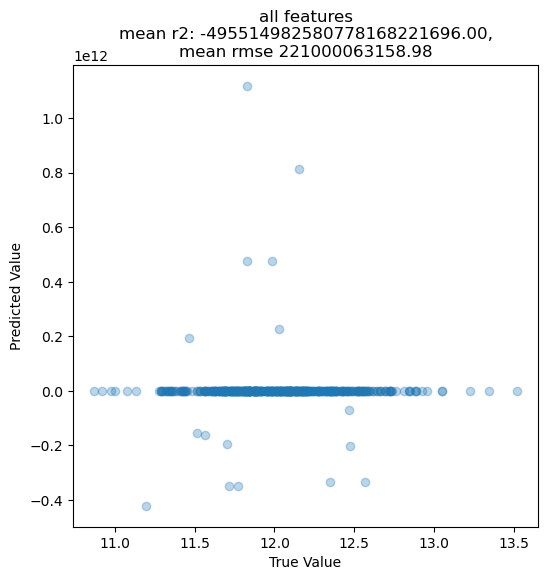

In [48]:
#r2_mean, rmse_mean, r2_sd, rmse_sd, regr, fig, ax = 
plt.ion()
stats, train_test_errors, model_data_and_pred, fig_and_ax = run_linear_regression_with_kf(
    features=features, 
    target=target, 
    n_splits=n_splits, 
    title='all features'
)

all_stats['all'] = stats


## model has difficulty inferring with several very large outliers

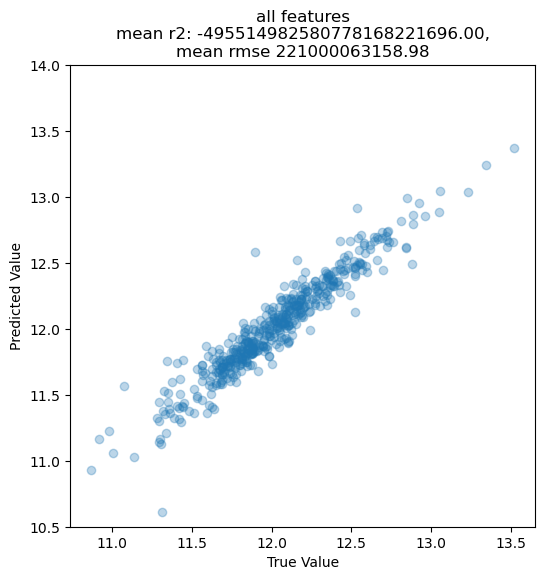

In [49]:
# plot ignoring outliers
fig, ax = fig_and_ax
ax.set_ylim(10.5, 14)
fig

## Overfitting - bias and variance

In [50]:
# the model is overfit 
rmse_mean, rmse_sd, train_rmse_mean, train_rmse_sd = train_test_errors
print(f'test rmse ± sd: \t {rmse_mean} ± {rmse_sd}')
print(f'train rmse ± sd:\t {train_rmse_mean} ± {train_rmse_sd}')


test rmse ± sd: 	 221000063158.98474 ± 177266562754.07864
train rmse ± sd:	 0.09506550256708347 ± 0.006115406397293888


## PCA all features to 100 dimensions 

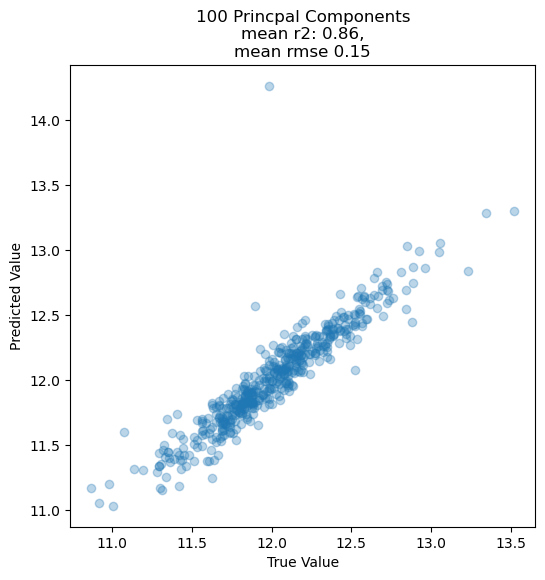

In [56]:
from sklearn.decomposition import PCA
n_components = 100
# n_components = model_df.shape[1]
p = PCA(n_components=n_components )
features_pca = p.fit_transform(features)
stats, train_test_errors, model_data_and_pred, fig_and_ax = run_linear_regression_with_kf(
    features=features_pca, 
    target=target, 
    title=f'{n_components} Princpal Components', 
    n_splits=n_splits
)

all_stats['all_pca'] = stats
# fewer dimensions - higher bias error?


## overfitting?

In [57]:
# the model is NOT overfit 
rmse_mean, rmse_sd, train_rmse_mean, train_rmse_sd = train_test_errors
print(f'test rmse ± sd: \t {rmse_mean} ± {rmse_sd}')
print(f'train rmse ± sd:\t {train_rmse_mean} ± {train_rmse_sd}')

test rmse ± sd: 	 0.14907342144884175 ± 0.00883564133104543
train rmse ± sd:	 0.12028386887655561 ± 0.004459715130116818


# Model Comparison

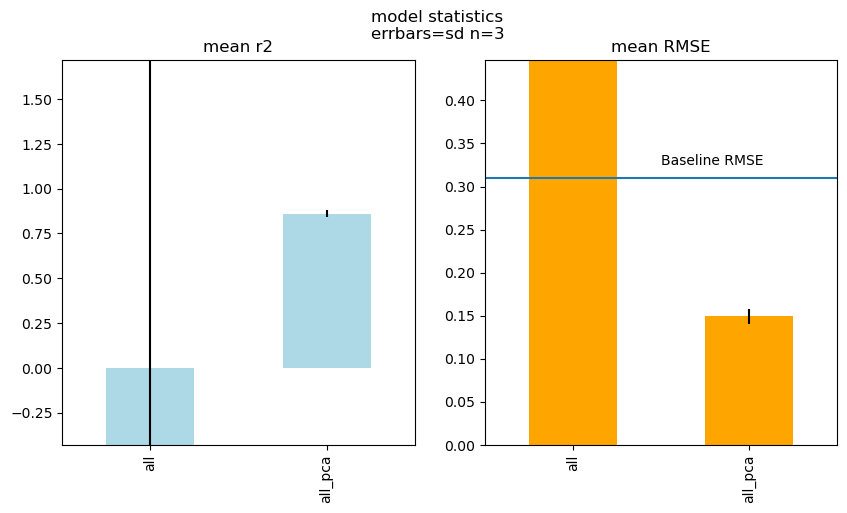

In [58]:
# create combined stats df
stats_df = pd.DataFrame.from_dict(all_stats).set_index(
    pd.Index(
        ['r2_mean', 'rmse_mean', 'r2_sd', 'rmse_sd'], 
        name='statistics'
    )
)

# plot figures
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
stats_df.loc['r2_mean'].plot(ax=axs[0], kind='bar', yerr=stats_df.loc['r2_sd'], title='mean r2',  color='lightblue', ylim=(-stats_df.loc['r2_mean']['all_pca']/2, stats_df.loc['r2_mean']['all_pca']*2))
stats_df.loc['rmse_mean'].plot(ax=axs[1], kind='bar', yerr=stats_df.loc['rmse_sd'], title=f'mean RMSE',  color='orange', ylim=(0, stats_df.loc['rmse_mean']['all_pca']*3)) 

# plot baseline - guess mean every time RMSE
xmin, xmax = plt.xlim()
axs[1].hlines(baseline_rmse, xmin=xmin, xmax=xmax)
axs[1].text(xmax/3, baseline_rmse + baseline_rmse*0.05, 'Baseline RMSE')

# title and show
plt.suptitle(f'model statistics\nerrbars=sd n={n_splits}')
plt.show()


#### EXERCISE_START: Fit a PCA model with fewer dimensions.
What do you think the out come will be?
#### EXERCISE_SOLUTION:
upping variables in classifier, reduce bias error.
tail ends of distributions can have high predictive power - a small amount of variance can be impactful
#### EXERCISE_END

# Jump back in here
just before the break we saw that:

1. fitting a linear model to all 215 features of the dataset produced a poor model
2. if you transformed all those features with PCA the model was massively improved

Thinking back on the testing assumptions lesson yesterday - 
Does anyone have a feeling for how that could happen?

OK, Let's explore the data a little:


# check multicolinearity with Variance Inflation Factor

1. VIF = 1 / (1 - R^2)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]


vif_data.sort_values("VIF", ascending=False).head(10)

/usr/local/anaconda3/envs/highdim_workshop/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,LowQualFinSF,inf
129,Neighborhood_NridgHt,inf
131,Neighborhood_SWISU,inf
132,Neighborhood_Sawyer,inf
133,Neighborhood_SawyerW,inf
134,Neighborhood_Somerst,inf
135,Neighborhood_StoneBr,inf
136,Neighborhood_Timber,inf
137,Neighborhood_Veenker,inf
144,Condition1_Artery,inf


In [83]:
(
    vif_data[vif_data["VIF"] != np.inf]
        .sort_values("VIF", ascending=False)
        .head(10)
)


,feature,VIF
38,Electrical_SBrkr,126.121599
34,Electrical_FuseA,97.918578
101,MasVnrType_None,49.687660
100,MasVnrType_BrkFace,45.410466
35,Electrical_FuseF,30.471327
102,MasVnrType_Stone,17.558474
16,YearBuilt,15.404638
139,GarageType_Attchd,14.362481
143,GarageType_Detchd,11.374210
22,GarageCars,7.625737


In [78]:
# VIF dataframe
vif_data_pca = pd.DataFrame()
vif_data_pca["feature_pca"] = range(features_pca.shape[1])
  
# calculating VIF for each feature
vif_data_pca["VIF_pca"] = [variance_inflation_factor(features_pca, i)
                          for i in range(features_pca.shape[1])]

vif_data_pca.sort_values("VIF_pca", ascending=False).head(20)


,feature_pca,VIF_pca
19,19,1.0
92,92,1.0
97,97,1.0
38,38,1.0
8,8,1.0
59,59,1.0
12,12,1.0
52,52,1.0
86,86,1.0
88,88,1.0


1. all pca_features a UN-correlated! How can this be??
1. what we know so far:
    1. PCA *transformed* the data
    2. when we selected the n_components we reduced the dimensions of the data.\
    
   
  
let's talk about how this happens.   

THe main intuition I want you keep in mind is that:



# What Is Going On?

## Intuition: 

#### PCA is a way to rotate the *axes* of your dataset around the *data* so that the axes line up with the *directions of the greatest variation* through the data.






# reviewed

1. exlpored Ames housing dataset
2. looked for variables that would correlate with/be good predictors for housing prices
3. indicated that PCA might be a way to approach this problem


We'll go into more detail on PCA in the next episode